## kubectl

### 获得集群信息
```
kubectl cluster-info
```

In [1]:
!kubectl cluster-info

Kubernetes master is running at https://192.168.99.100:8443
CoreDNS is running at https://192.168.99.100:8443/api/v1/namespaces/kube-system/services/kube-dns:dns/proxy

To further debug and diagnose cluster problems, use 'kubectl cluster-info dump'.


### 获得节点信息
```
kubectl get nods
```

In [2]:
!kubectl get nodes

NAME       STATUS   ROLES    AGE   VERSION
minikube   Ready    master   25d   v1.10.0


## pods


### 显示pods列表
```
kubectl get pods
```
#### 显示某命名空间下pods列表
```
kubectl get pods --namespace=kube-system
```
#### 显示所有pods列表
```
kubectl get pods --all-namespaces
```

In [3]:
!kubectl get pods

No resources found.


In [4]:
!kubectl get pods --all-namespaces

NAMESPACE     NAME                                    READY   STATUS    RESTARTS   AGE
kube-system   coredns-c4cffd6dc-9f48b                 1/1     Running   1          25d
kube-system   etcd-minikube                           1/1     Running   0          4h
kube-system   kube-addon-manager-minikube             1/1     Running   1          25d
kube-system   kube-apiserver-minikube                 1/1     Running   0          4h
kube-system   kube-controller-manager-minikube        1/1     Running   0          4h
kube-system   kube-dns-86f4d74b45-96cnw               3/3     Running   4          25d
kube-system   kube-proxy-8bfx7                        1/1     Running   0          4h
kube-system   kube-scheduler-minikube                 1/1     Running   1          25d
kube-system   kubernetes-dashboard-6f4cfc5d87-9nrw4   1/1     Running   4          25d
kube-system   storage-provisioner                     1/1     Running   4          25d


In [5]:
!kubectl get pods --namespace=kube-system

NAME                                    READY   STATUS    RESTARTS   AGE
coredns-c4cffd6dc-9f48b                 1/1     Running   1          25d
etcd-minikube                           1/1     Running   0          4h
kube-addon-manager-minikube             1/1     Running   1          25d
kube-apiserver-minikube                 1/1     Running   0          4h
kube-controller-manager-minikube        1/1     Running   0          4h
kube-dns-86f4d74b45-96cnw               3/3     Running   4          25d
kube-proxy-8bfx7                        1/1     Running   0          4h
kube-scheduler-minikube                 1/1     Running   1          25d
kubernetes-dashboard-6f4cfc5d87-9nrw4   1/1     Running   4          25d
storage-provisioner                     1/1     Running   4          25d


In [8]:
!docker image ls

REPOSITORY          TAG                 IMAGE ID            CREATED             SIZE
lab4_frontend       latest              5ef2d3074b41        10 hours ago        23.5MB
node-base           latest              307ed92ad780        12 hours ago        473MB
node                latest              c82dc5e6186f        14 hours ago        895MB
lab4_frontend-dev   latest              4ba93e7e30b7        17 hours ago        682MB
lab4_caculate       latest              6799de1e5708        18 hours ago        90MB
lab4_notification   latest              9f2dc3f5261a        18 hours ago        90MB
lab4_backend        latest              1bff1ddc05a5        19 hours ago        90.4MB
tornado-base        latest              3fda5c87356e        24 hours ago        90MB
lab3_web            latest              a5fef1fc1cde        27 hours ago        90.4MB
xxx                 latest              58b13f7797f6        27 hours ago        90.4MB
flask-base          latest              df02fb336c99  

## Deployment


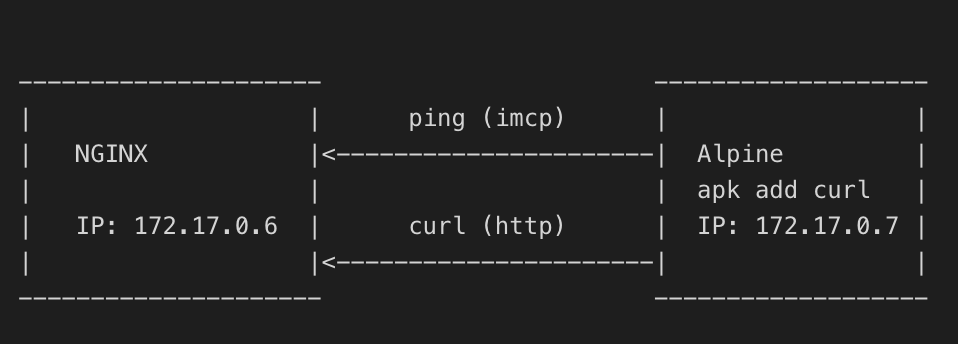

### 创建Deployment 1
```
kubectl run -i --tty network-node --image=busybox  --image-pull-policy=IfNotPresent
```

### 在已有pod上执行命令
```
kubectl exec -i -t <pod-name> -- [command] <para1,> <para2,> <...>
```

In [4]:
!kubectl run -i --tty network-node --image=alpine --image-pull-policy=IfNotPresent

kubectl run --generator=deployment/apps.v1beta1 is DEPRECATED and will be removed in a future version. Use kubectl create instead.
If you don't see a command prompt, try pressing enter.
/ # Session ended, resume using 'kubectl attach network-node-587b6cb7cd-fpgzn -c network-node -i -t' command when the pod is running


In [17]:
!kubectl get pods

NAME                            READY   STATUS    RESTARTS   AGE
hello-web-66c4c9fd9f-j8fmd      1/1     Running   0          2h
network-node-77f8786db9-blrpk   1/1     Running   0          2m


In [5]:
!kubectl exec -i -t network-node-587b6cb7cd-9fplp -- ifconfig

eth0      Link encap:Ethernet  HWaddr 02:42:AC:11:00:07  
          inet addr:172.17.0.7  Bcast:172.17.255.255  Mask:255.255.0.0
          UP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1
          RX packets:16 errors:0 dropped:0 overruns:0 frame:0
          TX packets:0 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:0 
          RX bytes:1330 (1.2 KiB)  TX bytes:0 (0.0 B)

lo        Link encap:Local Loopback  
          inet addr:127.0.0.1  Mask:255.0.0.0
          UP LOOPBACK RUNNING  MTU:65536  Metric:1
          RX packets:0 errors:0 dropped:0 overruns:0 frame:0
          TX packets:0 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1000 
          RX bytes:0 (0.0 B)  TX bytes:0 (0.0 B)



In [6]:
!kubectl exec -i -t hello-web-66c4c9fd9f-j8fmd ifconfig

eth0      Link encap:Ethernet  HWaddr 02:42:AC:11:00:06  
          inet addr:172.17.0.6  Bcast:172.17.255.255  Mask:255.255.0.0
          UP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1
          RX packets:43 errors:0 dropped:0 overruns:0 frame:0
          TX packets:8 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:0 
          RX bytes:3332 (3.2 KiB)  TX bytes:1426 (1.3 KiB)

lo        Link encap:Local Loopback  
          inet addr:127.0.0.1  Mask:255.0.0.0
          UP LOOPBACK RUNNING  MTU:65536  Metric:1
          RX packets:0 errors:0 dropped:0 overruns:0 frame:0
          TX packets:0 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:1000 
          RX bytes:0 (0.0 B)  TX bytes:0 (0.0 B)



In [7]:
!kubectl exec -i -t network-node-587b6cb7cd-9fplp -- ping 172.17.0.6 -c 4

PING 172.17.0.6 (172.17.0.6): 56 data bytes
64 bytes from 172.17.0.6: seq=0 ttl=64 time=1.295 ms
64 bytes from 172.17.0.6: seq=1 ttl=64 time=0.063 ms
64 bytes from 172.17.0.6: seq=2 ttl=64 time=0.065 ms
64 bytes from 172.17.0.6: seq=3 ttl=64 time=0.067 ms

--- 172.17.0.6 ping statistics ---
4 packets transmitted, 4 packets received, 0% packet loss
round-trip min/avg/max = 0.063/0.372/1.295 ms


为什么要 -- ??

In [8]:
!kubectl exec -i -t network-node-587b6cb7cd-9fplp ping 172.17.0.6 -c 4

Error from server (BadRequest): container 4 is not valid for pod network-node-587b6cb7cd-9fplp


In [9]:
!kubectl exec -i -t network-node-587b6cb7cd-9fplp apk add curl

fetch http://dl-cdn.alpinelinux.org/alpine/v3.8/main/x86_64/APKINDEX.tar.gz
fetch http://dl-cdn.alpinelinux.org/alpine/v3.8/community/x86_64/APKINDEX.tar.gz
(1/5) Installing ca-certificates (20171114-r3)
7  0%                                                                           87  1% #                                                                         87  2% #                                                                         87  2% ##                                                                        87  3% ##                                                                        87  4% ###                                                                       87  5% ###                                                                       87  5% ####                                                                      87  6% ####                                                                      87  6% #####                                     

In [10]:
!kubectl exec -i -t network-node-587b6cb7cd-9fplp -- curl 172.17.0.6

<!DOCTYPE html>
<html>
<head>
<title>Welcome to nginx!</title>
<style>
    body {
        width: 35em;
        margin: 0 auto;
        font-family: Tahoma, Verdana, Arial, sans-serif;
    }
</style>
</head>
<body>
<h1>Welcome to nginx!</h1>
<p>If you see this page, the nginx web server is successfully installed and
working. Further configuration is required.</p>

<p>For online documentation and support please refer to
<a href="http://nginx.org/">nginx.org</a>.<br/>
Commercial support is available at
<a href="http://nginx.com/">nginx.com</a>.</p>

<p><em>Thank you for using nginx.</em></p>
</body>
</html>


#### 查看信息
kubectl logs <POD_NAME>

In [11]:
!kubectl logs hello-web-66c4c9fd9f-j8fmd

172.17.0.5 - - [06/Dec/2018:12:10:14 +0000] "GET / HTTP/1.1" 200 612 "-" "curl/7.61.1" "-"
172.17.0.7 - - [06/Dec/2018:12:17:40 +0000] "GET / HTTP/1.1" 200 612 "-" "curl/7.61.1" "-"


#### 导出服务 （从集群外访问集群内）

In [12]:
!kubectl expose deployment hello-web --port=8080 --target-port=80 --type=NodePort

service/hello-web exposed


#### 查看服务信息

In [13]:
!kubectl get services

NAME         TYPE        CLUSTER-IP       EXTERNAL-IP   PORT(S)          AGE
hello-web    NodePort    10.107.196.255   <none>        8080:31583/TCP   36s
kubernetes   ClusterIP   10.96.0.1        <none>        443/TCP          27d


#### 访问服务

查看服务 hello-web 的端口为 8080:31583/TCP

在浏览器内打开 http://localhost:31583